In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
df=pd.read_csv("head brainsize2.csv",sep=',')
df

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [3]:
df.shape

(237, 4)

In [4]:
df.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
df['AgeRange'].value_counts()

2    127
1    110
Name: AgeRange, dtype: int64

In [6]:
df.columns

Index(['Gender', 'AgeRange', 'HeadSize', 'BrainWeight'], dtype='object')

In [47]:
df.dtypes

Gender           int64
AgeRange         int64
HeadSize       float64
BrainWeight      int64
dtype: object

In [46]:
df['HeadSize']=df['HeadSize'].astype('float64')      # "To change the data types of more than 1 columns"; df = df.astype({'Age': 'float64', 'Name': 'object'})

In [48]:
df.dtypes

Gender           int64
AgeRange         int64
HeadSize       float64
BrainWeight      int64
dtype: object

In [49]:
df.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       237 non-null    int64  
 1   AgeRange     237 non-null    int64  
 2   HeadSize     237 non-null    float64
 3   BrainWeight  237 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 7.5 KB


In [51]:
df.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [52]:
df.skew()

Gender         0.265554
AgeRange      -0.144748
HeadSize       0.238807
BrainWeight    0.265478
dtype: float64

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


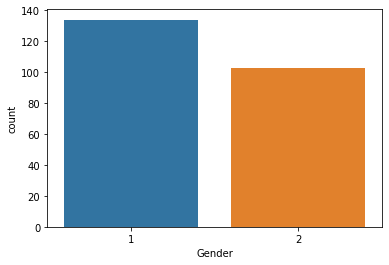

In [53]:
sns.countplot(df['Gender'])
plt.show()

<AxesSubplot:>

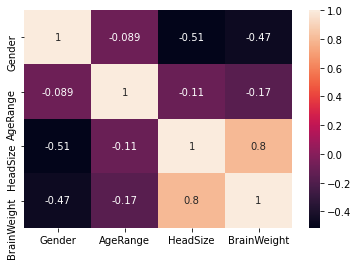

In [54]:
cor=df.corr()
sns.heatmap(cor,annot=True)


C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


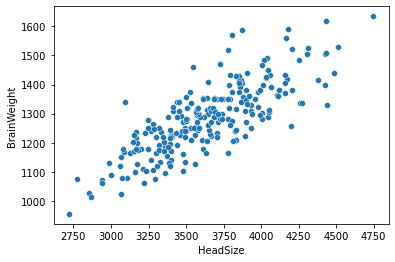

In [55]:
sns.scatterplot(df['HeadSize'],df['BrainWeight'])
plt.show()

<AxesSubplot:ylabel='HeadSize'>

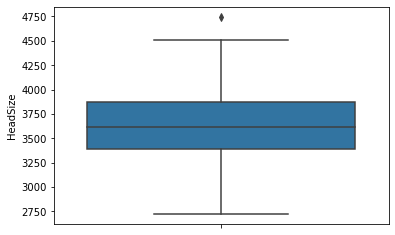

In [56]:
sns.boxplot(y=df['HeadSize'])

<AxesSubplot:ylabel='BrainWeight'>

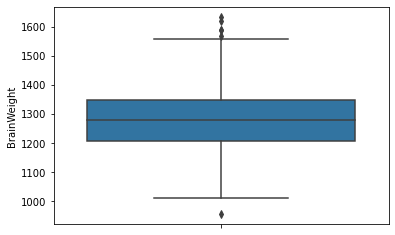

In [57]:
sns.boxplot(y=df['BrainWeight'])

In [58]:
from scipy.stats import zscore

In [59]:
z=np.abs(zscore(df))

In [60]:
df1=df[(z<3).all(axis=1)]

In [61]:
df.shape

(237, 4)

In [62]:
df1.shape

(236, 4)

In [63]:
x=df[['Gender', 'AgeRange', 'HeadSize']]
y=df['BrainWeight']

In [64]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=56)

In [65]:
xtrain.shape

(189, 3)

In [66]:
xtest.shape

(48, 3)

In [67]:
ytrain.shape

(189,)

In [68]:
ytest.shape

(48,)

In [69]:
lm=LinearRegression()

In [70]:
lm.fit(xtrain,ytrain)

LinearRegression()

In [72]:
lm.coef_

array([-20.82457836, -36.55166003,   0.2240642 ])

In [73]:
lm.intercept_

551.4912562460316

In [80]:
lm.score(xtrain,ytrain)

0.6230120627846067

In [81]:
ypred=lm.predict(xtest)

In [86]:
mean_absolute_error(ytest,ypred)

65.01208515084299

In [88]:
mean_squared_error(ytest,ypred)

5805.002929406876

In [89]:
np.sqrt(mean_squared_error(ytest,ypred))

76.1905698194132

In [90]:
r2_score(ytest,ypred)

0.7053320597832451

In [99]:
#Predict the BrainSize:

H=np.array([1,1,3738])

In [100]:
H.shape

(3,)

In [101]:
H=H.reshape(1,-1)
H.shape

(1, 3)

In [102]:
lm.predict(H)

array([1331.66699632])